# using this code as openai is not free

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

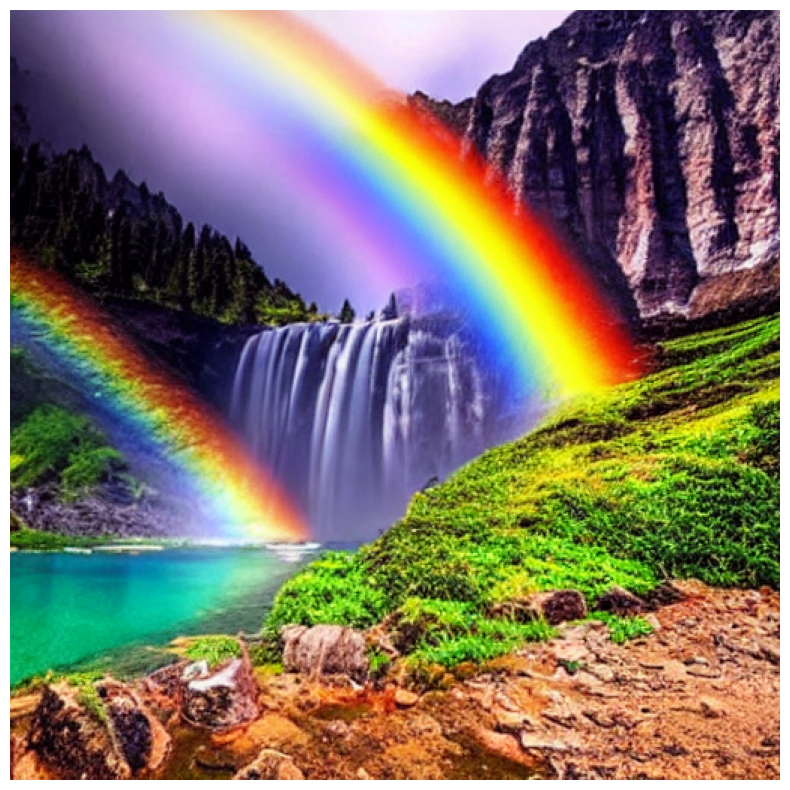

In [ ]:
%pip install diffusers transformers accelerate safetensors
%matplotlib inline
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image
import matplotlib.pyplot as plt

pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    # Removed torch_dtype=torch.float16 as float16 is typically for GPU
    # You can keep it if your CPU supports bfloat16 or other reduced precision
)
# pipe = pipe.to("cuda")  # Use "cpu" if no GPU - Commented out the line causing the error
pipe = pipe.to("cpu")   # Explicitly set the device to "cpu"

prompt = "A majestic mountain landscape with waterfalls and rainbows"
image = pipe(prompt).images[0]
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

# code instance using DALL-E

In [ ]:
# from transformers import DALL_E
# import torch
# from PIL import Image
# import requests
# from io import BytesIO

# # Load DALL·E model and processor (hypothetical, this could be an API call to OpenAI's DALL·E model)
# model = DALL_E.from_pretrained("openai/dall-e")

# # Input text prompt
# prompt = "A futuristic city skyline at sunset, with flying cars and neon lights"

# # Generate the image based on the prompt
# generated_image = model.generate(prompt)

# # Convert generated tensor to image
# image = Image.fromarray(generated_image[0].numpy())

# # Display the generated image
# image.show()

# # Optionally, save the generated image
# image.save("generated_image.jpg")

import openai
from PIL import Image
import requests
from io import BytesIO

openai.api_key = "YOUR_API_KEY"  # Replace with your OpenAI API key

response = openai.Image.create(
    prompt="A futuristic city skyline at sunset, with flying cars and neon lights",
    n=1,
    size="512x512"
)

image_url = response['data'][0]['url']
image = Image.open(requests.get(image_url, stream=True).raw)
image.show()
